In [268]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.linear_model import Lasso,RidgeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import seaborn as sns



In [269]:
data = pd.read_csv('datasets/titanic.csv')

In [270]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: xlabel='Age', ylabel='Fare'>

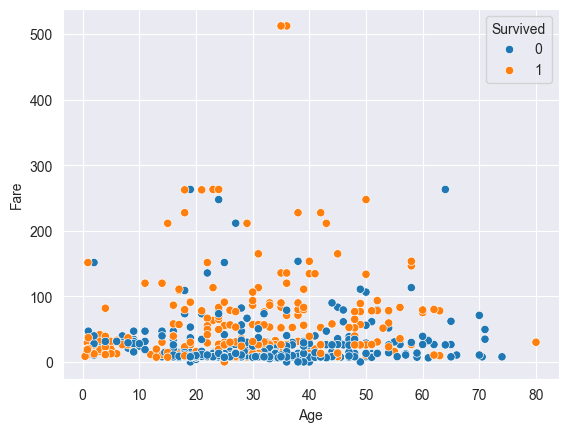

In [271]:
sns.scatterplot(data=data, x='Age', y='Fare', hue='Survived')

<Axes: >

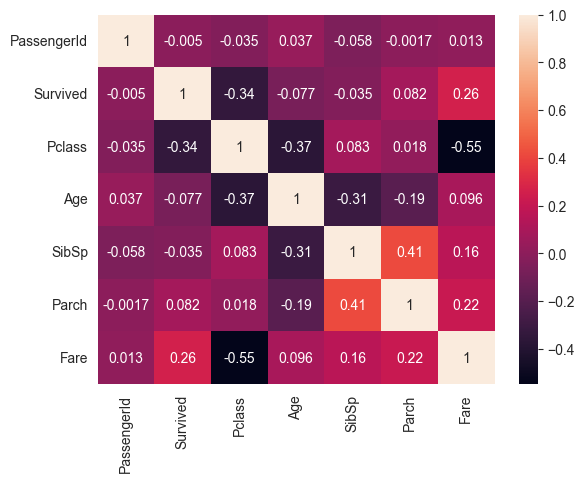

In [272]:
sns.heatmap(data.corr(numeric_only=True), annot=True)

In [273]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [274]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [275]:
print(data['Age'].isnull().sum())

177


In [276]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [277]:
data['Age'] = data.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.median()))

In [278]:
data = data.drop(columns=['Name', 'PassengerId', 'Ticket', 'Cabin','Embarked'])

In [279]:
X = data.drop(columns=['Survived'])
y = data['Survived']


In [280]:
# num_features = X.drop(columns=['Sex'])
# cat_features = X['Sex']

num_features = [ 'Age', 'SibSp', 'Parch', 'Fare']
cat_features = ['Sex']

In [281]:
num_transformer = Pipeline([
    ('scaler', StandardScaler()),
])
cat_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', num_transformer,num_features),
    ('cat', cat_transformer,cat_features)
])

In [282]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
grid = dict()
grid_log = dict()
grid_boost = dict()
grid_knn = dict()
grid_rfc = dict()
grid['ridge__alpha'] = np.arange(0,1,0.1)
grid_log['logreg__C'] = np.logspace(-3,3,10) 
grid_boost = {
    'grad_boost__n_estimators': [50, 100, 200],       
    'grad_boost__learning_rate': [0.01, 0.1, 0.3],  
    'grad_boost__max_depth': [2, 3, 4]
}
grid_knn['knn__n_neighbors'] = np.arange(5,20)
grid_rfc = {
    'rfc__n_estimators': [50,100,200],
    'rfc__max_depth': [2, 3, 4]
}


In [283]:
model_l1 = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', RidgeClassifier() ),
])

In [284]:
model_logreg = Pipeline([
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression())
])

model_boost = Pipeline([
    ('preprocessor', preprocessor),
    ('grad_boost', GradientBoostingClassifier())
])

In [285]:
model_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsClassifier())
])

In [286]:
model_rfc = Pipeline([
    ('preprocessor', preprocessor),
    ('rfc', RandomForestClassifier())
])

In [287]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
ridge = GridSearchCV(model_l1,cv=cv,param_grid=grid)
logreg = GridSearchCV(model_logreg,cv=cv,param_grid=grid_log)
grad_boost = GridSearchCV(model_boost,cv=cv, param_grid=grid_boost)
knn = GridSearchCV(model_knn, cv=cv, param_grid=grid_knn)
rfc = GridSearchCV(model_rfc , cv=cv, param_grid=grid_rfc)


In [288]:
res_ridge = ridge.fit(X,y)

/Users/batyrbaev/PycharmProjects/titanic_ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.62137e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/batyrbaev/PycharmProjects/titanic_ML/.venv/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.93552e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [289]:
res_logreg = logreg.fit(X,y)

In [290]:
res_grad_boost = grad_boost.fit(X,y)

In [291]:
res_knn = knn.fit(X,y)

In [292]:
res_rfc = rfc.fit(X,y)

In [293]:
print(res_ridge.best_score_)
print(res_ridge.best_params_)

0.7845081915761722
{'ridge__alpha': np.float64(0.1)}


In [294]:
print(res_logreg.best_score_)
print(res_logreg.best_params_)

0.7878852551628899
{'logreg__C': np.float64(2.154434690031882)}


In [295]:
print(res_grad_boost.best_score_)
print(res_grad_boost.best_params_)

0.8170924612390937
{'grad_boost__learning_rate': 0.01, 'grad_boost__max_depth': 4, 'grad_boost__n_estimators': 100}


In [296]:
print(res_knn.best_score_)
print(res_knn.best_params_)

0.805881614462369
{'knn__n_neighbors': np.int64(16)}


In [297]:
print(res_rfc.best_score_)
print(res_rfc.best_params_)

0.8103571652752495
{'rfc__max_depth': 4, 'rfc__n_estimators': 50}


In [298]:
scores = {
    'ridge': res_ridge.best_score_,
    'logreg': res_logreg.best_score_,
    'rfc': res_rfc.best_score_,
    'grad_boost': res_grad_boost.best_score_,
    'knn': res_knn.best_score_
}

<Axes: >

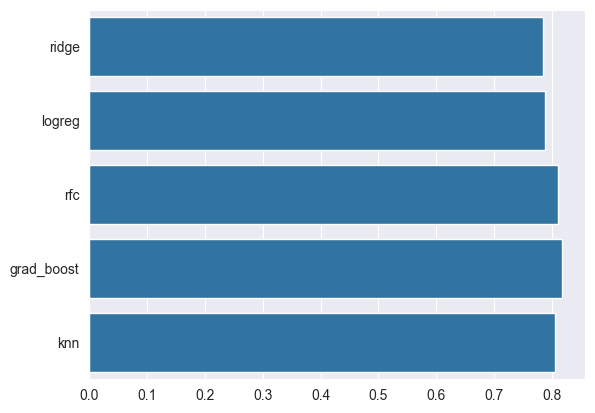

In [299]:
sns.barplot(x=scores.values(), y=scores.keys())

In [352]:
test = pd.read_csv('datasets/test.csv')
passenger_id = test['PassengerId']

In [353]:
test = test.drop(columns=['Name', 'PassengerId', 'Ticket', 'Cabin','Embarked'])
# test = test.drop(columns=['Name', 'PassengerId', 'Ticket', 'Cabin','Embarked'])

In [354]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     332 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    417 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


In [355]:
test['Age'] = test.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.median()))


imputer = SimpleImputer(strategy='mean')
imputer.fit(test[['Fare']])
test['Fare'] = imputer.transform(test[['Fare']])

In [356]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


In [357]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500
414,1,female,39.0,0,0,108.9000
415,3,male,38.5,0,0,7.2500
416,3,male,27.0,0,0,8.0500


In [368]:
y_pred = grad_boost.predict(test)
print(len(y_pred))

418


In [369]:
passengers_result = pd.DataFrame({
    'PassengerId': passenger_id,
    'Survived': y_pred
})

passengers_result.to_csv('datasets/passengers.csv', index=False)
